In [136]:
import random
import time
import matplotlib.pyplot as plt

WALLS = {
    0: [0, 0, 0, 0],  # Нет стен
    1: [0, 0, 0, 1],  # Запад
    2: [0, 0, 1, 0],  # Север
    3: [0, 1, 0, 0],  # Восток
    4: [1, 0, 0, 0],  # Юг
    5: [1, 0, 0, 1],  # Юг и Запад
    6: [1, 1, 0, 0],  # Юг и Восток
    7: [0, 1, 1, 0],  # Север и Восток
    8: [0, 0, 1, 1],  # Север и Запад
    9: [0, 1, 0, 1],  # Запад и Восток
    10: [1, 0, 1, 0], # Юг и Север
    11: [1, 1, 1, 0], # Юг, Восток, Север
    12: [0, 1, 1, 1], # Запад, Север, Восток
    13: [1, 0, 1, 1], # Юг, Запад, Север
    14: [1, 1, 0, 1], # Юг, Восток, Запад
    15: [1, 1, 1, 1]  # Все стены
}

# [Юг, Восток, Север, Запад]

def create_maze(width, height):
    maze = [[15 for _ in range(width)] for _ in range(height)]
    start_vertex = (0, 0)
    randomized_dfs(maze, start_vertex)
    create_central_square(maze, width, height, 2)
    add_outer_walls(maze)
    return maze

def randomized_dfs(maze, vertex):
    x, y = vertex
    maze[y][x] &= ~(1 << 0)  # Помечаем вершину как посещенную

    directions = [(0, -1, 'n'), (0, 1, 's'), (-1, 0, 'w'), (1, 0, 'e')]
    random.shuffle(directions)

    for dx, dy, direction in directions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(maze[0]) and 0 <= ny < len(maze) and maze[ny][nx] == 15:
            next_vertex = (nx, ny)
            connect_cells(maze, vertex, next_vertex, direction)
            randomized_dfs(maze, next_vertex)

def connect_cells(maze, vertex, next_vertex, direction):
    x, y = vertex
    nx, ny = next_vertex

    if direction == 'n':
        maze[y][x] &= ~(1 << 1)  # Убираем северную стену
        maze[ny][nx] &= ~(1 << 2)  # Убираем южную стену
    elif direction == 's':
        maze[y][x] &= ~(1 << 2)  # Убираем южную стену
        maze[ny][nx] &= ~(1 << 1)  # Убираем северную стену
    elif direction == 'w':
        maze[y][x] &= ~(1 << 3)  # Убираем западную стену
        maze[ny][nx] &= ~(1 << 0)  # Убираем восточную стену
    elif direction == 'e':
        maze[y][x] &= ~(1 << 0)  # Убираем восточную стену
        maze[ny][nx] &= ~(1 << 3)  # Убираем западную стену
#     print(x, y)
#     print()
#     fig = visualize_maze(maze)
#     time.sleep(0.1)
    

def visualize_maze(maze, path=[]):
    fig, ax = plt.subplots()
    ax.set_xticks(range(len(maze[0]) + 1))
    ax.set_yticks(range(len(maze) + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)

    for y in range(len(maze)):
        for x in range(len(maze[0])):
            if maze[y][x] & (1 << 0):  # Восточная стена
                ax.plot([x + 1, x + 1], [y, y + 1], 'k-')
            if maze[y][x] & (1 << 1):  # Северная стена
                ax.plot([x, x + 1], [y, y], 'k-')
            if maze[y][x] & (1 << 2):  # Южная стена
                ax.plot([x, x + 1], [y + 1, y + 1], 'k-')
            if maze[y][x] & (1 << 3):  # Западная стена
                ax.plot([x, x], [y, y + 1], 'k-')

    if path:
        path_x, path_y = zip(*path)
        path_x = [x + 0.5 for x in path_x]  # Смещаем координаты x на 0.5 вправо
        path_y = [y + 0.5 for y in path_y]  # Смещаем координаты y на 0.5 вниз
        ax.plot(path_x, path_y, 'r-', linewidth=2)

    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    return fig

def create_central_square(maze, width, height, size):
    add = 1
    if width % 2 == 0 and height % 2 == 0:
        add = 0
    print(size)
    center_x = width // 2
    center_y = height // 2

    for y in range(center_y - size // 2, center_y + size // 2 + add):
        for x in range(center_x - size // 2, center_x + size // 2 + add):
            if 0 <= x < width and 0 <= y < height:
                maze[y][x] = 0  # Убираем все стены внутри квадрата

def add_outer_walls(maze):
    width = len(maze[0])
    height = len(maze)

    for y in range(height):
        for x in range(width):
            if x == 0:  # Левая граница
                maze[y][x] |= (1 << 3)  # Устанавливаем западную стену
            if x == width - 1:  # Правая граница
                maze[y][x] |= (1 << 0)  # Устанавливаем восточную стену
            if y == 0:  # Верхняя граница
                maze[y][x] |= (1 << 1)  # Устанавливаем северную стену
            if y == height - 1:  # Нижняя граница
                maze[y][x] |= (1 << 2)  # Устанавливаем южную стену


2


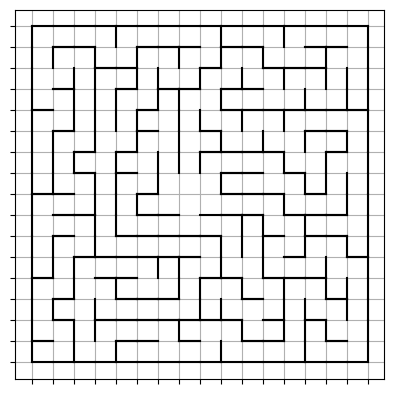

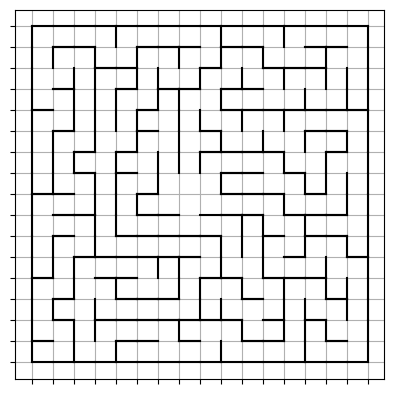

In [104]:
width, height = 16, 16
maze = create_maze(width, height)
visualize_maze(maze)
    
# width, height = 10, 10
# maze = create_maze(width, height)
# print_maze(maze)


2


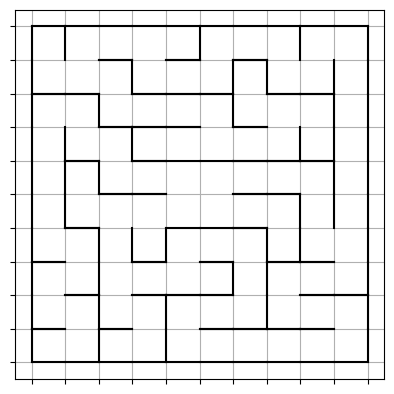

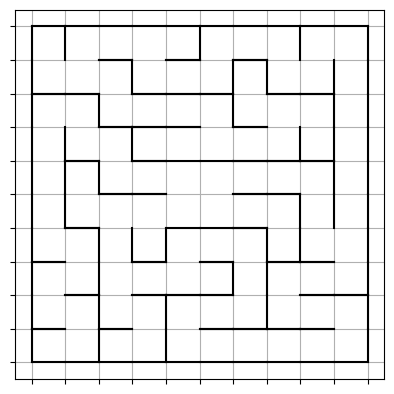

In [127]:
width, height = 10, 10
maze = create_maze(width, height)
visualize_maze(maze)

In [171]:
maze

[[14, 2, 14, 2, 10, 6, 6, 6, 6, 3],
 [10, 4, 10, 4, 12, 6, 2, 10, 6, 5],
 [12, 2, 8, 6, 2, 6, 8, 12, 6, 3],
 [10, 4, 8, 10, 12, 6, 4, 10, 10, 1],
 [8, 10, 4, 4, 0, 0, 6, 4, 8, 9],
 [8, 12, 10, 6, 0, 0, 6, 6, 4, 9],
 [8, 10, 4, 14, 6, 2, 6, 2, 10, 9],
 [12, 4, 10, 6, 6, 4, 10, 4, 4, 9],
 [10, 2, 4, 10, 6, 2, 12, 10, 2, 9],
 [12, 12, 6, 4, 6, 12, 6, 4, 12, 5]]

In [172]:
maze[0][0], maze[1][0]

(14, 10)

In [ ]:
def print_maze(maze):
    for row in maze:
        print(' '.join(WALLS[cell] for cell in row))
    print()

In [167]:
# [Юг, Восток, Север, Запад]

def move_up(maze, x, y):
    if y > 0 and WALLS[maze[y][x]][2]:
        return (x, y + 1)
    return (x, y)

def move_down(maze, x, y):
    if y < len(maze) - 1 and WALLS[maze[y][x]][0]:
        return (x, y - 1)
    return (x, y)

def move_left(maze, x, y):
    if x > 0 and WALLS[maze[y][x]][3]:
        return (x - 1, y)
    return (x, y)

def move_right(maze, x, y):
    if x < len(maze[0]) - 1 and WALLS[maze[y][x]][1]:
        return (x + 1, y)
    return (x, y)


In [158]:
def create_path(maze, start, end):
    path = [start]
    x, y = start
    step = 0
    while (x, y) != end and step != 100:
        step += 1
        nx, ny = move_right(maze, x, y)
        if (nx, ny) == (x, y):
            nx, ny = move_left(maze, x, y)
        elif (nx, ny) == (x, y):
            nx, ny = move_down(maze, x, y)
        elif (nx, ny) == (x, y):
            nx, ny = move_up(maze, x, y)
        path.append((nx, ny))
        x, y = nx, ny
        #print(step, end=' ')

    return path

(5, 5)
[1, 1, 0, 1] (0, 0)
[0, 0, 1, 0]
[0, 0, 1, 0] (1, 0)
[0, 0, 1, 0] (1, 0)
[0, 0, 1, 0] (1, 0)
[0, 0, 1, 0] (1, 0)
[0, 0, 1, 0] (1, 0)
[0, 0, 1, 0] (1, 0)
[0, 0, 1, 0] (1, 0)
[(0, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0)]


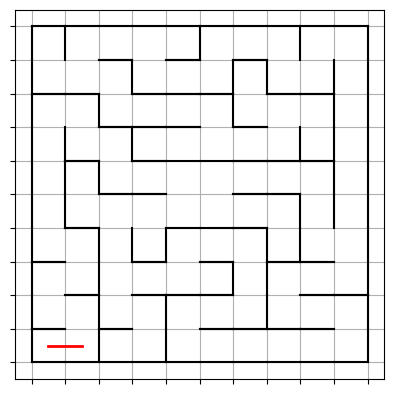

In [170]:
start = (0, height - 1)
end = (width // 2, height // 2)
print(end)
# path = create_path(maze, start, end)
path = [start]
x, y = start
print(WALLS[maze[y][x]], (x, y))
x, y = move_right(maze, x, y)
path.append((x, y))
print(WALLS[maze[y][x]])
x, y = move_up(maze, x, y)
path.append((x, y))
print(WALLS[maze[y][x]], (x, y))
x, y = move_left(maze, x, y)
path.append((x, y))
print(WALLS[maze[y][x]], (x, y))
x, y = move_up(maze, x, y)
path.append((x, y))
print(WALLS[maze[y][x]], (x, y))
x, y = move_right(maze, x, y)
path.append((x, y))
print(WALLS[maze[y][x]], (x, y))
x, y = move_up(maze, x, y)
path.append((x, y))
print(WALLS[maze[y][x]], (x, y))
x, y = move_left(maze, x, y)
path.append((x, y))
print(WALLS[maze[y][x]], (x, y))
x, y = move_up(maze, x, y)
path.append((x, y))
print(WALLS[maze[y][x]], (x, y))
print(path)
visualize_maze(maze, path)
plt.show()